In [1]:
from openbb_terminal.sdk import openbb

In [2]:
import pandas as pd
import re

def color_negative_red(valin):
    try:
        val = float(valin.replace(",", ""))
        if val > 0:
            color = 'lightgreen'
        elif val < 0:
            color = 'red'
        else:
            color = 'yellow'
    except:
        try:
            val = float(valin.split(" ")[0].replace(",", ""))
            if val > 0:
                color = 'lightgreen'
            elif val < 0:
                color = 'red'
            else:
                color = 'yellow'
        except:
            color = 'magenta'

    return 'color: %s' % color

def color_dataframe(df: pd.DataFrame):
    """Color the dataframe based on the values of the columns and rows

    Returns
    -------
    df: pd.DataFrame
        colored dataframe
    """
    '''
    for col in df.columns:
        # checks whether column exists
        if col in df.columns:
            df[col] = df[col].apply(lambda x: return_colored_value(str(x)))
   
    for row in df.rows:
        # checks whether row exists
        if row in df.index:
            df.loc[row] = df.loc[row].apply(
                lambda x: return_colored_value(str(x))
            )
    '''
    df.index = [' '.join(re.split('(?<=.)(?=[A-Z])', val)).capitalize() for val in df.index]
    return df.style.format(precision=0).applymap(color_negative_red)

# COINBASE RESEARCH

In [3]:
ticker = "COIN"

In [4]:
openbb.stocks.fa.overview("COIN").T["Description"].values[0]

'Coinbase Global, Inc. provides financial infrastructure and technology for the crypto economy. The company is headquartered in Wilmington, Delaware.'

In [5]:
df = openbb.stocks.load(ticker, start_date="2021-01-01")

Loading Daily data for COIN with starting period 2021-04-14.

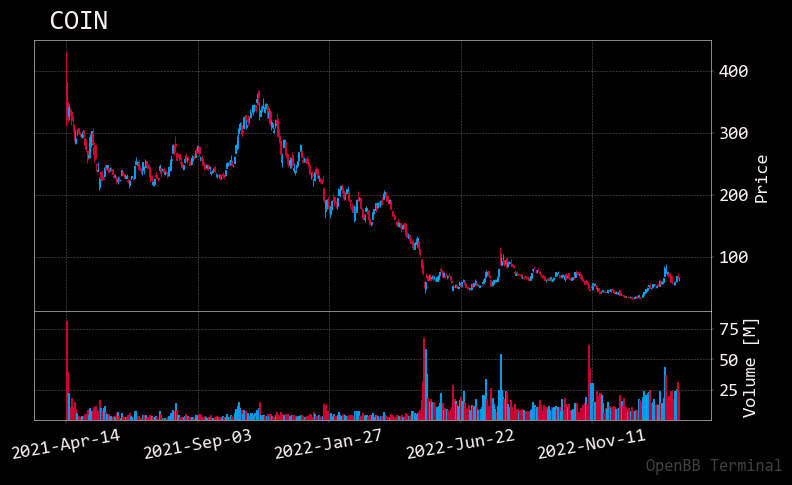

In [6]:
openbb.stocks.candle(data=df, symbol=ticker)

In [7]:
for idx, row in openbb.news("Coinbase").reset_index().iterrows():
    print(f'{row["published"]} - {row["title"]}')
    print(row["link"] + "\n")

    if idx > 4:
        break

Fetching data. Please be patient

2023-02-20 23:04:00+00:00 - Coinbase's Earnings Could Be Brutal. Why an Analyst Upgraded the Stock Anyway. - Barron's
https://news.google.com/rss/articles/CBMiZmh0dHBzOi8vd3d3LmJhcnJvbnMuY29tL2FydGljbGVzL2NvaW5iYXNlLWVhcm5pbmdzLWFuYWx5c3QtdXBncmFkZS1zdG9jay1jcnlwdG8tYml0Y29pbi1ldGhlci0yZGE0MzMzZdIBamh0dHBzOi8vd3d3LmJhcnJvbnMuY29tL2FtcC9hcnRpY2xlcy9jb2luYmFzZS1lYXJuaW5ncy1hbmFseXN0LXVwZ3JhZGUtc3RvY2stY3J5cHRvLWJpdGNvaW4tZXRoZXItMmRhNDMzM2U?oc=5

2023-02-20 18:32:31+00:00 - Two California Federal Courts Grant Motions to Compel Arbitration ... - JD Supra
https://news.google.com/rss/articles/CBMiTmh0dHBzOi8vd3d3Lmpkc3VwcmEuY29tL2xlZ2FsbmV3cy90d28tY2FsaWZvcm5pYS1mZWRlcmFsLWNvdXJ0cy1ncmFudC04OTYyMzQ1L9IBAA?oc=5

2023-02-20 16:20:18+00:00 - 250,000,000,000 Shiba Inu and 2,500 Ethereum Sent to Coinbase in Pair of Massive Transfers: PeckShield - The Daily Hodl
https://news.google.com/rss/articles/CBMigwFodHRwczovL2RhaWx5aG9kbC5jb20vMjAyMy8wMi8yMC8yNTAwMDAwMDAwMDAtc2hpYmEtaW51LWFuZC0yNTAwLWV0aGV

I like to start with the company news, to have an idea of what is going on and if there's any red flag or any upcoming event.

In [8]:
openbb.stocks.fa.pt("COIN").tail(5)

AttributeError: Module or method 'stocks.fa' has no attribute 'pt'.

In [9]:
print(f'Last adjusted close price {df.tail(1)["Adj Close"].values[0]:.2f}')

Last adjusted close price 65.20


Looking at the last 5 analyst price targets, which date from last week - the stock price is around those values and is either a HOLD or BUY. In fact, the latest price target, from Compass Point, puts stock target at $ 100.

In [10]:
openbb.stocks.fa.pt_chart("COIN")

AttributeError: Module or method 'stocks.fa' has no attribute 'pt_chart'.

Looking for price targets over the past year, it's clear that analysts have been rather optimistic about Coinbase. And the stock tends to be below that target price.

In [11]:
openbb.stocks.fa.earnings(ticker)

,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,2023-02-21,-2.53,-,-
2,2022-11-03,-2.4,-2.43,-0.0121
3,2022-08-09,-2.65,-4.95,-0.8651
4,2022-05-10,0.21,-1.98,-10.3396
5,2022-02-24,1.85,3.32,0.7936
6,2021-11-09,1.57,1.62,0.0351
7,2021-08-10,2.33,6.42,1.7577
8,2021-05-13,3.09,3.05,-0.0117
9,2021-03-23,-,-,-


In [12]:
openbb.stocks.fa.epsfc(ticker)

,fiscalyear,consensus_mean,change %,analysts,actual,consensus_low,consensus_high
0,2021,14.665,0,15.0,17.102,10.760,18.210
0,2022,-5.552,-132.463585,8.0,0,-12.620,-1.940
0,2023,-2.870,-48.314935,10.0,0,-6.320,0.910


Coinbase earnings will occur this week.

It seems that the EPS estimate last quarter was pretty accurate, and given the downturn market in crypto it seems that the estimates are pointing to a worse earnings per share than last quarter.

If this estimate is correct, this means that if the company distributed all of its net income for the period, shareholders would receive for each share of stock they own -2.43.

In [13]:
df = openbb.stocks.fa.balance("COIN", source="AlphaVantage", quarterly=True)
color_dataframe(df)
# note that the colors don't correspond to the rows that we are referring to (e.g. liabilities is green because number is positive even though liability implies a "loss")

fiscalDateEnding,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30
Reported currency,USD,USD,USD,USD,USD,USD,USD
Total assets,10.201 B,15.790 B,18.454 B,21.274 B,20.895 B,105.468 B,111.168 B
Total current assets,8.673 B,14.238 B,15.870 B,18.374 B,16.941 B,102.162 B,107.680 B
Cash and cash equivalents at carrying value,1.983 B,4.366 B,6.353 B,7.123 B,6.116 B,5.682 B,5.007 B
Cash and short term investments,1.983 B,4.366 B,6.363 B,7.135 B,6.137 B,5.701 B,5.024 B
Inventory,0,0,0,0,0,0,0
Current net receivables,208.828 M,619.675 M,331.820 M,457.256 M,402.815 M,308.022 M,300.876 M
Total non current assets,1.635 B,1.673 B,3.185 B,3.489 B,3.385 B,3.688 B,3.891 B
Property plant equipment,50.331 M,52.175 M,55.632 M,59.230 M,65.861 M,142.209 M,170.922 M
Accumulated depreciation amortization p p e,0,0,0,42.246 M,0,0,0


Balance sheet shows what a company owns and owes. 

- Coinbase has 111.168 B worth of total assets, 105.542 B worth of total liabilities and 5.626 B in total shareholder equity.
- Most assets and liabilities are current, which means that they can be sold or paid within 1 year.
- The company doesn't distribute earnings.

In [14]:
employees = openbb.stocks.fa.profile(ticker).T["fullTimeEmployees"].values[0]
print(f'Number of employees: {employees}')

Number of employees: 3730


In [15]:
df = openbb.stocks.fa.income("COIN", source="AlphaVantage", quarterly=True)
color_dataframe(df)

fiscalDateEnding,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30
Reported currency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
Gross profit,162.987 M,278.591 M,535.166 M,1.554 B,1.601 B,893.171 M,1.843 B,297.625 M,-248.591 M,148.826 M
Total revenue,186.382 M,315.357 M,585.112 M,1.801 B,2.228 B,1.312 B,2.498 B,1.166 B,808.325 M,590.339 M
Cost of revenue,23.395 M,36.766 M,49.946 M,246.962 M,627.028 M,418.737 M,655.325 M,868.811 M,1.057 B,441.513 M
Costof goods and services sold,23.395 M,36.766 M,49.946 M,234.066 M,335.426 M,197.251 M,501.181 M,277.826 M,167.187 M,101.876 M
Operating income,42.086 M,101.505 M,226.585 M,987.713 M,874.725 M,291.808 M,922.324 M,-554.463 M,-1.044 B,-556.484 M
Selling general and administrative,51.988 M,71.433 M,97.501 M,239.221 M,443.928 M,348.037 M,541.896 M,613.782 M,611.063 M,415.045 M
Research and development,60.777 M,73.319 M,90.498 M,184.225 M,291.461 M,356.264 M,459.611 M,570.664 M,609.249 M,556.338 M
Operating expenses,144.296 M,213.852 M,358.527 M,813.399 M,1.353 B,1.020 B,1.576 B,1.721 B,1.853 B,1.147 B
Investment income net,0,0,0,0,0,0,0,0,0,0


Income statement shows how much money a company spent and made.
- Gross profit from Coinbase was 148.826 M. This is the amount of income left over after subtracting the cost of producing goods and selling itrs products from its total sales revenue.
- Total revenue was 590.339 M, which means that the cost of revenue was 441.513 M.
- Cost of revenue is different from cost of goods sold (COGS) because the former also includes costs outside of production, such as distribution and marketing. Since COGS was 101.876 M, it means that distribution and marketing cost Coinbase 339.637 M.
- Operating expenses cost Coinbase 1.147 B last quarter. These are expenses that are not directly related with their product. As other companies did in 2022, Coinbase over-hired last year - as seen on cell above they have around 3730 employees - which may be a value hard to justify.
- After taking into account depreciation and interest and income tax expenses, Coinbase net income is -544.635 M.

In [16]:
df = openbb.stocks.fa.cash("COIN", source="AlphaVantage", quarterly=True)
color_dataframe(df)

fiscalDateEnding,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30
Reported currency,USD,USD,USD,USD,USD,USD,USD
Operating cashflow,3.412 B,3.983 B,342.047 M,2.993 B,-830.114 M,-3.034 B,-953.501 M
Payments for operating activities,0,0,0,3.793 M,190 K,43.440 M,39.420 M
Proceeds from operating activities,0,0,0,0,0,0,0
Change in operating liabilities,110.697 M,174.621 M,-71.119 M,94.931 M,23.762 M,1.449 M,-115.855 M
Change in operating assets,46.563 M,-3.545 M,-53.931 M,38.989 M,3.938 M,-46.967 M,115.619 M
Depreciation depletion and amortization,10.922 M,12.612 M,17.099 M,23.018 M,31.580 M,42.027 M,40.114 M
Capital expenditures,4.406 M,29.616 M,7.113 M,44.648 M,10.281 M,25.548 M,15.749 M
Change in receivables,11.976 M,-95.730 M,46.510 M,45.260 M,-45.145 M,1.453 M,11.481 M
Change in inventory,0,0,0,0,0,0,0


Cashflow statements shows the money flowing in and out of the company
- Operating cashflow: -953.501 M
- Investing cashflow: -19.078 M
- Financing cashflow: -42.468 M

In [17]:
df = openbb.stocks.fa.ratios(ticker, quarterly=True)
color_dataframe(df[df.columns[::-1]])

# Note that the only reason why I am able to access quarterly ratios here is because I am subscribed to the premium FMP plan
# After signing up with FMP, this is how I added it here
# openbb.keys.fmp(key="MY FMP KEY", persist=True)

Fiscal Date Ending,2021-09,2021-12,2022-03,2022-06,2022-09
Period,Q3,Q4,Q1,Q2,Q3
Current ratio,1.650,1.609,1.551,1.062,1.055
Quick ratio,0.705,0.673,0.613,0.066,0.056
Cash ratio,0.661,0.624,0.560,0.059,0.049
Days of sales outstanding,92.319,66.800,126.048,139.088,186.028
Days of inventory outstanding,0,0,0,0,0
Operating cycle,22.764,16.471,31.080,34.296,45.870
Days of payables outstanding,13.424,7.153,4.098,21.934,54.343
Cash conversion cycle,9.339,9.318,26.983,12.362,-8.473
Gross profit margin,0.850,0.799,0.762,0.793,0.827


Liquidity ratios:
- Current ratio of 1.055. This corresponds to how a business’s current assets can be used to settle current liabilities. This ratio is okish.
- Quick ratio of 0.056. Coinbase is not in a position to meet its current obligations because it has insufficient assets to be liquidated.
- Cash ratio of 0.049. This measures a business’s ability to use cash and cash equivalent to pay off short-term liabilities, which is poor. But note that this is a more conservative measure because only cash and cash equivalent is used - which is company's most liquid assets.

Leverage ratios:
- Debt-to-equity ratio of 18.759. This ratio tells us that there are $ 18.759 from debt for every dollar invested in the company. This seems very risky, as debt is being used to finance business growth.
- Debt ratio is 0.949, which means that for every dollar in total assets, there's 94.9 cents in debt. Coinbase has more assets than debt, but not by much - they are very leveraged.

Efficiency ratios:
- Asset turnover ratio of 0.005 - measures how much net sales are made from average assets.
- Payable turnover ratio of 1.656 - calculates how quickly Coinbase pays its suppliers and creditors.
- Receivables turnover ratio of 1.962 - measure how quickly they turn customers’ invoices into cash.

Profitability ratios:
- Gross margin of 0.827 - measures how much profit a business makes after the cost of goods and services compared to net sales. This is a great margin, typical from SaaS.
- Operating margin of 0.943 - for every dollar of sale, Coinbase is losing 94.3 cents.
- Return on Assets of -0.005 - determines how much profits they generate from total assets or resources, including current and noncurrent assets. 
- Return on Equity of -0.097 - measures how much profit a business generates from shareholders’ equity. This means that investors are losing with their investment.

Market Value ratios:
- P/E Ratio is -6.628 - measures how valuable a company is relative to its book value earnings per share.
- P/B ratio is 2.567 - measures the market's valuation of a company relative to its book value.
- P/S ratio is 24.461 - indicator of the value that financial markets have placed on each dollar of a company’s sales or revenues.
- Enterprise value multiple is -22.177 - used to calculate the value of a company. This means that the company has more cash than it would need to pay off any debt and buy back all its stocks in one go.

Something about that.

In [18]:
# help(openbb.stocks.fa.est)
color_dataframe(openbb.stocks.fa.est(ticker)[2])

AttributeError: Module or method 'stocks.fa' has no attribute 'est'.

These values are in millions, and this corresponds to the estimates for revenues. The estimates point for a 80% decrease on total revenue since 1 year ago.

In [19]:
# help(openbb.stocks.fa.est)
color_dataframe(openbb.stocks.fa.est(ticker)[1])

AttributeError: Module or method 'stocks.fa' has no attribute 'est'.

These values are in millions, and this corresponds to the estimates for earnings. The estimates point for Coinbase not generating profit anytime soon.

In [20]:
openbb.stocks.fa.mgmt(ticker);
# Business insider doesn't contain information on the management team

No management information in Business Insider for COIN

In [21]:
openbb.stocks.fa.rating(ticker).head(10)

AttributeError: Module or method 'stocks.fa' has no attribute 'rating'.

With those financials, analyst consensus overall is a Buy. Only when looking to Price to Earnings, the outlook is more worrying where consensus is a strong sell.

In [22]:
openbb.stocks.fa.sec(ticker)

AttributeError: Module or method 'stocks.fa' has no attribute 'sec'.

When looking at the latest filings, there has been some disclosures around insider trading - which we will look in a second in more detail.

On the 1st of February of 2023, there was a 8K being filed around bylaws amending. However on the 10th of January, one can read:

```
On January 10, 2023, Coinbase Global, Inc. (the “Company”) announced certain preliminary unaudited financial and operating results for its year ended December 31, 2022. (...)

The Company’s audited financial statements for the year ended December 31, 2022 are not yet available. Accordingly, these preliminary financial and operating results are an estimate and subject to the completion of the Company’s financial closing and other procedures and finalization of the Company’s consolidated financial statements for its year ended December 31, 2022, including the completion of the audit of the Company’s financial statements. (...)

The Company further announced that it expects certain of its operating expenses - comprising Sales and Marketing Expenses, Technology and Development + General and Administrative Expenses, including stock-based compensation and excluding restructuring expenses and Other operating expenses, net - for the quarter ending March 31, 2023 to be approximately 25% lower than those operating expenses for the quarter ended December 31, 2022. This is the result of ongoing cost management initiatives, including the Plan (as defined below).

(...)

On January 10, 2023, the Company announced a further restructuring plan (the “Plan”) to manage its operating expenses in response to the ongoing market conditions impacting the cryptoeconomy, as well as ongoing business prioritization efforts. The Plan involves a reduction of the Company’s workforce by approximately 950 employees. The Company expects execution of the Plan to be substantially complete by the second quarter of 2023.

In connection with these actions, the Company estimates that it will incur approximately $149 million to $163 million in total restructuring expenses, consisting of approximately $58 million to $68 million in cash charges related to employee severance and other termination benefits. Of the aggregate charges that the Company expects to incur in connection with the Plan, the Company expects that approximately $91 million to $95 million will be in stock-based compensation expenditures relating to the acceleration of the vesting of outstanding equity awards in accordance with the terms of such awards. The Company expects to recognize substantially all of these charges in the first quarter of 2023.
```

This is a much more interesting statement, which discloses some estimates from Coinbase on their next financials reportings. Worth mentions:
* 950 employees laid off
* Operating expenses reduced by 25%
* 149 to 163 millions in total restructuring expenses (91 to 95 M from it in stock-based compensation, the rest will be in cash charges)

In [23]:
display(openbb.stocks.ins.stats(ticker).head(20)[["Filing Date", "Trading Date", "Insider", "Title", "Trade Type", "Price", "Quantity", "Owned", "Delta Own", "Value", "Filing Link"]])

,Filing Date,Trading Date,Insider,Title,Trade Type,Price,Quantity,Owned,Delta Own,Value,Filing Link
0,2023-02-16 16:11:56,2023-02-14,Armstrong Brian,"COB, CEO, 10%",S - Sale+OE,$57.83,"-29,732",0,-100%,"-$1,719,338",http://www.sec.gov/Archives/edgar/data/1679788...
1,2023-02-09 16:15:54,2023-02-07,Lutke Tobias,Dir,P - Purchase,$72.95,"+4,960","209,352",+2%,"+$361,832",http://www.sec.gov/Archives/edgar/data/1679788...
2,2023-02-06 16:23:08,2023-02-02,Grewal Paul,GC,S - Sale,$77.06,"-1,818","55,424",-3%,"-$140,099",http://www.sec.gov/Archives/edgar/data/1679788...
3,2023-02-06 16:18:24,2023-02-02,Armstrong Brian,"COB, CEO, 10%",S - Sale+OE,$79.33,"-44,598",0,-100%,"-$3,537,757",http://www.sec.gov/Archives/edgar/data/1679788...
4,2023-02-02 16:20:38,2023-01-31,Lutke Tobias,Dir,P - Purchase,$57.70,"+6,588","204,392",+3%,"+$380,128",http://www.sec.gov/Archives/edgar/data/1679788...
5,2023-02-01 16:13:58,2023-01-30,Armstrong Brian,"COB, CEO, 10%",S - Sale+OE,$58.61,"-29,732",0,-100%,"-$1,742,676",http://www.sec.gov/Archives/edgar/data/1679788...
6,2023-01-26 16:18:30,2023-01-24,Lutke Tobias,Dir,P - Purchase,$54.38,"+6,612","197,804",+3%,"+$359,561",http://www.sec.gov/Archives/edgar/data/1679788...
7,2023-01-20 16:12:21,2023-01-18,Lutke Tobias,Dir,P - Purchase,$54.21,"+6,834","191,192",+4%,"+$370,471",http://www.sec.gov/Archives/edgar/data/1679788...
8,2023-01-18 16:19:47,2023-01-13,Armstrong Brian,"COB, CEO, 10%",S - Sale+OE,$51.02,"-89,196",0,-100%,"-$4,551,203",http://www.sec.gov/Archives/edgar/data/1679788...
9,2023-01-12 16:28:58,2023-01-10,Haas Alesia J,CFO,S - Sale+OE,$38.53,"-88,000","276,464",-24%,"-$3,390,469",http://www.sec.gov/Archives/edgar/data/1679788...


The SEC filings from Coinbase employees trading stock is interesting. While Brian (CEO) has been selling, Tobias Lutke (Director) has been accumulating for the past few months.

In [24]:
insider = "Lutke Tobias"

df_insider = openbb.stocks.ins.stats(ticker)[["Filing Date", "Trading Date", "Insider", "Title", "Trade Type", "Price", "Quantity", "Owned", "Delta Own", "Value", "Filing Link"]]
total_bought = sum([float(val.replace("$", "").replace(",", "")) for val in df_insider[df_insider["Insider"] == insider]["Value"].values])

print(f'Total bought by {insider}: $ {total_bought/1_000_000:.2f} M')

Total bought by Lutke Tobias: $ 10.07 M


This is a very high value, after some research it's easy to find out that Tobias Lutke is Shopify CEO, and the news reported this event:
https://blockworks.co/news/shopify-ceo-spends-3m-on-coinbase-stock-in-2-months

In [25]:
openbb.stocks.gov.contracts(ticker)

,Date,Description,Agency,Amount
0,2022-05-20,COINBASE ANALYTICS PLATFORM LICENSES,DEPARTMENT OF HOMELAND SECURITY (DHS),29000.0


Government awarded a contract to Coinbase in May of 2022

In [26]:
openbb.stocks.gov.lobbying(ticker)

,Date,Ticker,Client,Amount,Issue,Specific_Issue
0,2023-01-20,COIN,"COINBASE, INC.",80000.0,Computer Industry \n Financial Institutions/In...,Policy issues related to digital assets and fi...
1,2023-01-20,COIN,"COINBASE, INC.",590000.0,Financial Institutions/Investments/Securities,H.R.5525 - ENABLERS Act: Provisions related to...
2,2023-01-20,COIN,"COINBASE, INC",0.0,None,None
3,2023-01-20,COIN,"COINBASE, INC.",60000.0,Taxation/Internal Revenue Code \n Banking \n F...,Tax treatment of digital assets. \n Legislatio...
4,2023-01-19,COIN,"COINBASE, INC.",30000.0,Financial Institutions/Investments/Securities,Issues related to the storage and trading of d...
5,2023-01-18,COIN,"COINBASE, INC.",60000.0,Financial Institutions/Investments/Securities,"Issues pertaining to cryptocurrency, digital a..."
6,2023-01-13,COIN,"COINBASE, INC.",50000.0,Financial Institutions/Investments/Securities,Policy issues related to digital assets and fi...
7,2022-10-20,COIN,"COINBASE, INC.",1040000.0,Financial Institutions/Investments/Securities,H.R.7614 - Digital Commodity Exchange Act of 2...
8,2022-10-20,COIN,"COINBASE, INC.",70000.0,Taxation/Internal Revenue Code \n Banking \n F...,Tax treatment of digital assets. \n Legislatio...
9,2022-10-20,COIN,"COINBASE, INC.",80000.0,Computer Industry \n Financial Institutions/In...,Policy issues related to digital assets and fi...


In [27]:
openbb.stocks.gov.government_trading(gov_type="congress", symbol=ticker).head(10)

,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,House,Range
0,2023-02-09,2022-12-20,COIN,Shri Thanedar,Sale,1001.0,Representatives,"$1,001-$15,000"
1,2022-12-23,2022-11-21,COIN,Marie Newman,Sale,1001.0,Representatives,"$1,001-$15,000"
2,2022-10-18,2022-09-30,COIN,Garret Graves,Purchase,1001.0,Representatives,"$1,001-$15,000"
3,2022-02-08,2022-01-04,COIN,Marie Newman,Purchase,1001.0,Representatives,"$1,001-$15,000"
4,2022-01-25,2021-12-21,COIN,Ed Perlmutter,Sale,1001.0,Representatives,"$1,001-$15,000"
5,2021-12-08,2021-11-18,COIN,Marie Newman,Purchase,15001.0,Representatives,"$15,001-$50,000"
6,2021-12-08,2021-11-09,COIN,Marie Newman,Purchase,15001.0,Representatives,"$15,001-$50,000"
7,2021-12-09,2021-11-05,COIN,Marie Newman,Sale,50001.0,Representatives,"$50,001-$100,000"
8,2021-12-08,2021-11-05,COIN,Marie Newman,Sale,50001.0,Representatives,"$50,001-$100,000"
9,2021-10-26,2021-09-23,COIN,Ed Perlmutter,Purchase,1001.0,Representatives,"$1,001-$15,000"


Note that these transactions occurred last year, as the representative only needs to financially disclose these within a 30 day window (which can be extended to 45)